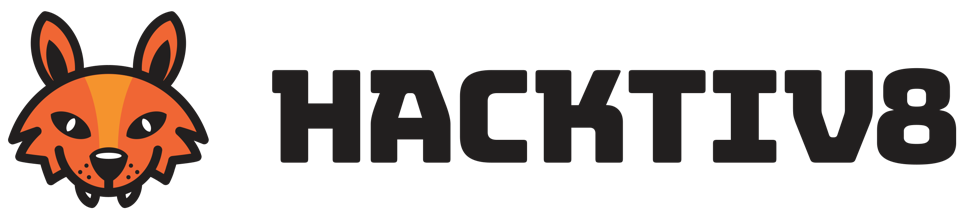

# FINAL PROJECT 4 : CLUSTERING

## Introduction

### Members 

1. Citra Puspa Tria
2. Fadhilah Gustriandini
3. Nabilla Yolanda Paramitha

### Data

Dataset yang digunakan pada project ini didapat dari website Kaggle (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).
Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.

Berikut ini disajikan keterangan dari setiap atribut:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

### Objective
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

## Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

## Data Loading

### Import Dataset

In [3]:
# Dilakukan load dataset menggunakan pandas
data = pd.read_csv(r"~/datasets/CC GENERAL.csv")
pd.set_option("display.max.columns", None)

In [4]:
# Akan dilihat 10 baris teratas dari dataset menggunakan fungsi head()
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
# Akan dilihat 10 baris terbawah dari dataset menggunakan fungsi tail()
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### Type of Data

In [6]:
# menggunakan metode info() untuk mendapatkan informasi dasar tentang kerangka data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### List of Columns

In [7]:
# menggunakan parameter .columns.values untuk mendapatkan list header kolom
data.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

### Index

In [8]:
# Menggunakan parameter .index untuk mendapatkan daftar indeks
data.index.values

array([   0,    1,    2, ..., 8947, 8948, 8949], dtype=int64)

### Number of Rows and Columns

In [9]:
# Menggunakan parameter .shape untuk mengetahui jumlah baris dan kolom pada dataset
data.shape

(8950, 18)

In [10]:
# Menghitung jumlah nilai unik pada setiap kolom
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

### Missing Values

In [11]:
#Mengecek missing values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
#Mengisi nilai missing values minimum payments
median_minimum = data["MINIMUM_PAYMENTS"].median()
data['MINIMUM_PAYMENTS'].fillna(median_minimum, inplace=True)

#Mengisi nilai missing values credit limit
median_credit = data["CREDIT_LIMIT"].median()
data['CREDIT_LIMIT'].fillna(median_credit, inplace=True)

In [13]:
#Mengecek kembali missing values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
#Menghapus kolom CUST_ID
data.drop('CUST_ID',axis=1, inplace=True)

In [15]:
data = data.rename(columns={'BALANCE':'Saldo', 'BALANCE_FREQUENCY':'FrekuensiSaldo', 'PURCHASES':'Pembelian', 
                        'ONEOFF_PURCHASES':'PembelianOneoff', 'INSTALLMENTS_PURCHASES':'PembelianAngsuran',
                        'CASH_ADVANCE':'PenarikanTunai', 'PURCHASES_FREQUENCY':'FrekuensiPembelian',
                        'ONEOFF_PURCHASES_FREQUENCY':'FrekuensiPembelianOneoff', 
                        'PURCHASES_INSTALLMENTS_FREQUENCY':'FrekuensiPembelianAngsuran', 
                        'CASH_ADVANCE_FREQUENCY':'FrekuensiPenarikanTunai', 'CASH_ADVANCE_TRX':'PenarikanTunaiTRX', 
                        'PURCHASES_TRX':'PembelianTRX', 'CREDIT_LIMIT':'BatasKredit', 'PAYMENTS':'Pembayaran',
                        'MINIMUM_PAYMENTS':'MinimalPembayaran', 'PRC_FULL_PAYMENT':'PembayaranFullPRC', 
                        'TENURE':'JangkaWaktu'})

data.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
data.columns

Index(['Saldo', 'FrekuensiSaldo', 'Pembelian', 'PembelianOneoff',
       'PembelianAngsuran', 'PenarikanTunai', 'FrekuensiPembelian',
       'FrekuensiPembelianOneoff', 'FrekuensiPembelianAngsuran',
       'FrekuensiPenarikanTunai', 'PenarikanTunaiTRX', 'PembelianTRX',
       'BatasKredit', 'Pembayaran', 'MinimalPembayaran', 'PembayaranFullPRC',
       'JangkaWaktu'],
      dtype='object')

In [17]:
for col in data.columns:
    print(col, ': ')
    print(data[col].value_counts())
    print('\n','*'*60,'\n')

Saldo : 
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: Saldo, Length: 8871, dtype: int64

 ************************************************************ 

FrekuensiSaldo : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.250000       8
0.100000       8
0.285714       8
0.142857       7
0.444444       7
0.166667       7
0.60000

## Data Exploration

In [18]:
# Membuat dataframe baru : data_copy
data_copy = data.copy()

# Menunjukkan 5 data teratas
data_copy.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
data_copy.describe()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<b> Kesimpulan  </b>

Dari perolehan statistika deskriptif untuk data di atas, dapat diambil informasi sebagai berikut:
1.  Setelah dilakukan praproses data, terdapat 8950 pengguna kartu kredit yang informasinya lengkap.
2.  Saldo yang dimiliki pengguna untuk transaksi berada di rentang 0 hngga 19043.14 dengan rata-rata 1564.47 serta rata-rata saldo pengguna sering diperbarui.
3.  Rata-rata total pembelian pengguna adalah 1003.20 dengan rata-rata maksimum pembelian dalam sekali transaksi mencapai 592.44 serta rata-rata pembelian dengan angsuran mencapai 411.07.
4.  Pembayaran uang muka tertinggi mencapai 47137.21 dengan rata-rata 2097.16.
5.  Rata-rata pengguna kartu kredit tidak sering melakukan pembelian baik dalam sekali transaksi maupun dengan angsuran.
6.  Rata-rata batas kredit pengguna adalah 4494.28 dengan jangka waktu pembayaran 11.5. 
7.  Jumlah pembayaran yang sudah dilakukan rata-rata mencapai 1733.14 dengan rata-rata pembayaran yang sudah lunas hanya sekitar 15% dari total pengguna kartu kredit.

### Visualizing Data

In [20]:
num_col = data_copy.columns

for col in num_col:
    count, bin_edges = np.histogram(data_copy[col])
    print(col)
    print(count)
    print(bin_edges)
    print('\n','*'*60,'\n')

Saldo
[6546 1333  577  279  135   40   21   11    6    2]
[    0.        1904.313856  3808.627712  5712.941568  7617.255424
  9521.56928  11425.883136 13330.196992 15234.510848 17138.824704
 19043.13856 ]

 ************************************************************ 

FrekuensiSaldo
[ 147  182  190  201  194  294  270  277  519 6676]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

 ************************************************************ 

Pembelian
[8645  234   45    4    8    7    2    2    2    1]
[    0.     4903.957  9807.914 14711.871 19615.828 24519.785 29423.742
 34327.699 39231.656 44135.613 49039.57 ]

 ************************************************************ 

PembelianOneoff
[8749  144   32    8    4    5    4    0    2    2]
[    0.     4076.125  8152.25  12228.375 16304.5   20380.625 24456.75
 28532.875 32609.    36685.125 40761.25 ]

 ************************************************************ 

PembelianAngsuran
[8678  209   35   14    3    8    2    0    0    

array([[<AxesSubplot:title={'center':'Saldo'}>,
        <AxesSubplot:title={'center':'FrekuensiSaldo'}>,
        <AxesSubplot:title={'center':'Pembelian'}>,
        <AxesSubplot:title={'center':'PembelianOneoff'}>],
       [<AxesSubplot:title={'center':'PembelianAngsuran'}>,
        <AxesSubplot:title={'center':'PenarikanTunai'}>,
        <AxesSubplot:title={'center':'FrekuensiPembelian'}>,
        <AxesSubplot:title={'center':'FrekuensiPembelianOneoff'}>],
       [<AxesSubplot:title={'center':'FrekuensiPembelianAngsuran'}>,
        <AxesSubplot:title={'center':'FrekuensiPenarikanTunai'}>,
        <AxesSubplot:title={'center':'PenarikanTunaiTRX'}>,
        <AxesSubplot:title={'center':'PembelianTRX'}>],
       [<AxesSubplot:title={'center':'BatasKredit'}>,
        <AxesSubplot:title={'center':'Pembayaran'}>,
        <AxesSubplot:title={'center':'MinimalPembayaran'}>,
        <AxesSubplot:title={'center':'PembayaranFullPRC'}>],
       [<AxesSubplot:title={'center':'JangkaWaktu'}>, <Axes

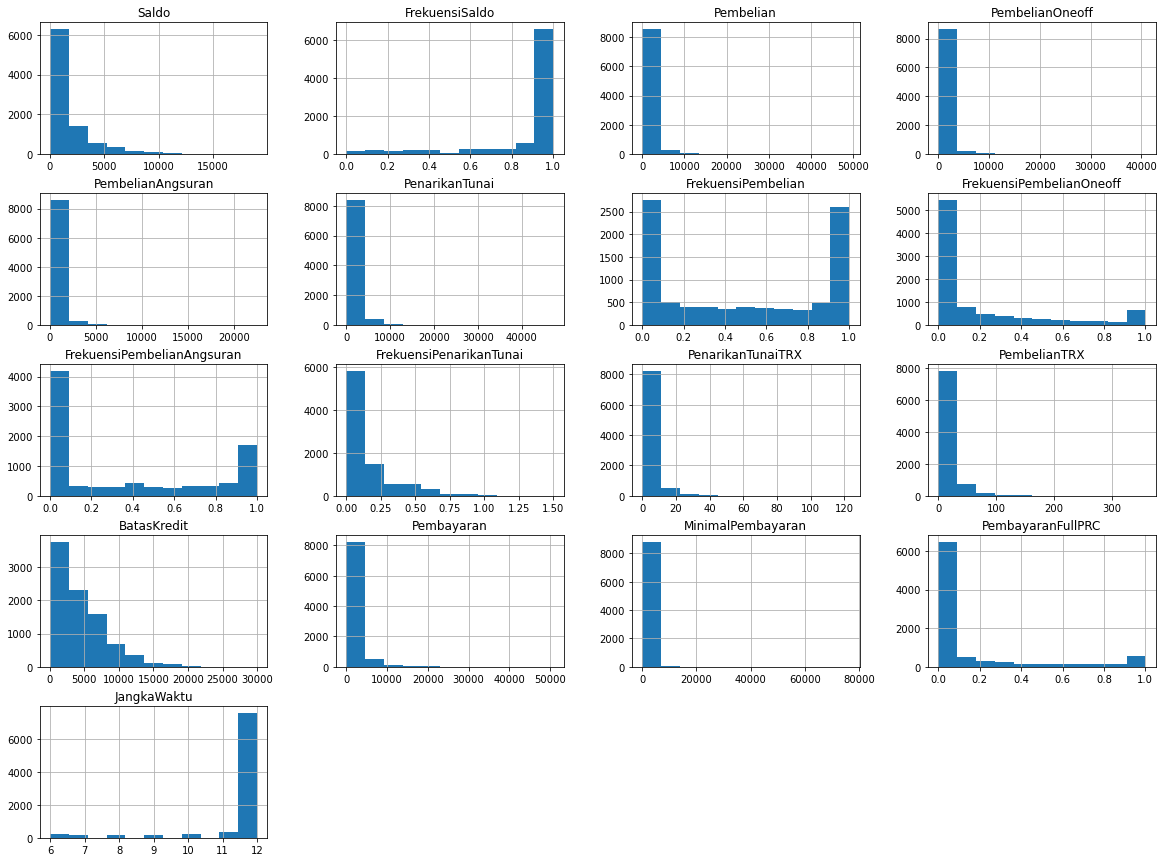

In [21]:
num_col = data_copy.columns
data_copy[num_col].hist(bins=11, figsize=(20, 15), layout=(5, 4))

<b> Kesimpulan  </b>:\
Berdasarkan histogram di atas, terlihat bahwa:
1. Pengguna paling banyak memiliki saldo di antara 0-1904.31 dengan total pengguna melebihi 6000 orang.
2. Pengguna paling banyak melakukan pembaharuan saldo dengan total pengguna melebihi 6000 orang.
3. Sebanyak lebih dari 8000 orang melakukan pembelian dengan total hingga 4903.96 dengan pembelian dalam satu kali transaksi mencapai 4076.13 dan pembelian dengan angsuran mencapai 2250.
4. Tidak ada perbedaan yang jauh antara pengguna yang sering melakukan pembelian dan tidak dengan jumlah keduanya sama-sama melebihi 2500 pengguna.
5. Sebanyak lebih dari 8000 pengguna kartu kredit membayar uang muka hingga 4713.72 di mana pengguna dengan total uang muka ini merupakan pengguna terbanyak yang melakukan pembayaran uang muka.
6. Meskipun batas kredit mencapai 30000, pengguna paling banyak memiliki batas kredit maksimal 3045 dengan total pengguna 4584.
7. Jangka waktu pembayaran yang paling banyak digunakan oleh pengguna adalah 12.

### Data Visualization for 'Jangka Waktu' Feature

In [22]:
# Melihat jangka waktu kredit pengguna
data_jw = pd.DataFrame(data['JangkaWaktu'].value_counts())
data_jw

,JangkaWaktu
12,7584
11,365
10,236
6,204
8,196
7,190
9,175


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


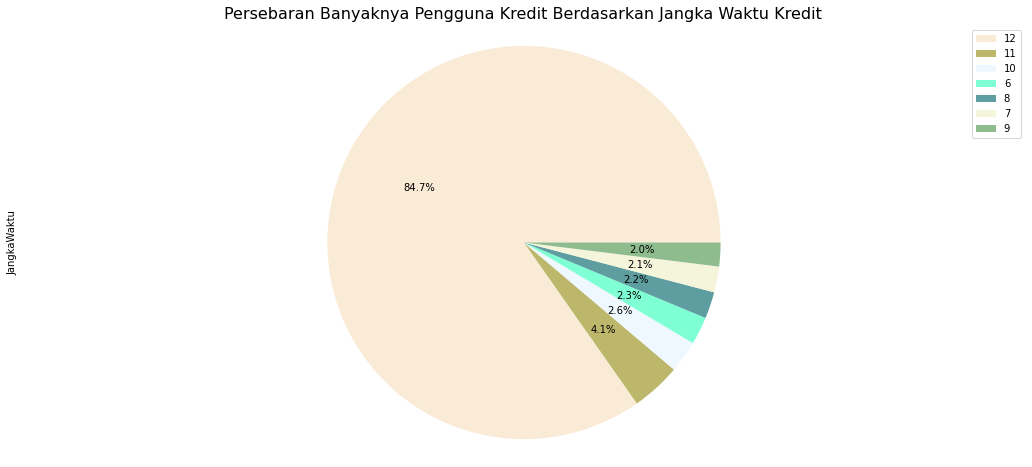

In [23]:
# Membuat pie chart dari jangka waktu kredit
color_list=['antiquewhite','darkkhaki', 'aliceblue', 'aquamarine', 'cadetblue', 'beige','darkseagreen' ]
data_jw.plot(kind='pie', figsize=(18,8),
                               autopct='%1.1f%%',
                                colors=color_list,labels=None,
                                subplots=True)
plt.title('Persebaran Banyaknya Pengguna Kredit Berdasarkan Jangka Waktu Kredit', fontsize=16)
plt.axis('equal')
plt.legend(labels=data_jw.index)

<b>Kesimpulan</b>

Dari pie chart dengan persentase diatas, didapat urutan dari 7 jangka waktu kredit dari setiap pengguna dari tinggi ke rendah adalah sebagai berikut :
1. 12 dengan persentase 84.7%
2. 11 dengan persentase 4.1%
3. 10 dengan persentase 2.6%
4. 6 dengan persentase 2.3%
5. 8 dengan persentase 2.2%
6. 7 dengan persentase 2.1%
7. 9 dengan persentase 2.0%

Perbedaan persentase dari jangka waktu kredit ke2 sampai ke7 tidak terlalu besar, tetapi dari jangka waktu kredit urutan pertama ke urutan selanjutnya memliki perbedaan yang besar


## Data Preprocessing

### Data Standardization

In [24]:
# Standardize data
scaler = StandardScaler() 
scaled = scaler.fit_transform(data)

In [25]:
# Statistics of scaled data
scaled_data = pd.DataFrame(scaled, columns=data.columns)
scaled_data.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## Generating Model

### K-Means Clustering

#### Defining Model 

In [26]:
Kmean = KMeans(n_clusters=2)
Kmean

KMeans(n_clusters=2)

#### Model Training

In [27]:
kmeansCluster = Kmean.fit(scaled_data)

In [28]:
kmeansCluster

KMeans(n_clusters=2)

#### Model Evaluation

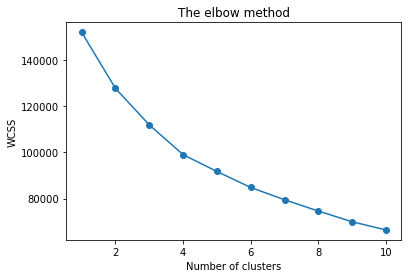

In [29]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=3)

In [31]:
data_kmeans = data.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

In [32]:
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
KMeans Segment,,,,,,,,,,,,,,,,,
0,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
2,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


In [33]:
data_transf_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)', 
                           1:'Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)', 
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
KMeans Segment,,,,,,,,,,,,,,,,,
Pengguna Level Tengah (Middle Ground),4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers),3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users),1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
Pengguna Kredit Hemat (Frugal Credit Users),894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


In [34]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Pengguna Level Tengah (Middle Ground)', 
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)', 
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,KMeans Segment,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Pengguna Level Tengah (Middle Ground)
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,Pengguna Kredit Hemat (Frugal Credit Users)
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...


In [53]:
# Melihat persentase dari masing-masing klaster
clust = pd.DataFrame({"Klaster":(data_kmeans['Labels'].unique()), 
                        "Percent":(data_kmeans['Labels'].value_counts()/data_kmeans.shape[0])*100}).reset_index()

In [54]:
clust.drop(['index'],axis=1)

,Klaster,Percent
0,Pengguna dengan Penarikan Tunai Tinggi (High C...,44.435754
1,Pengguna Level Tengah (Middle Ground),37.620112
2,Pengguna Kredit Hemat (Frugal Credit Users),13.374302
3,Pengguna dengan Kredit Pembelian Tinggi (High ...,4.569832


## Model Inference

In [55]:
data = data_kmeans.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Saldo                       8950 non-null   float64
 1   FrekuensiSaldo              8950 non-null   float64
 2   Pembelian                   8950 non-null   float64
 3   PembelianOneoff             8950 non-null   float64
 4   PembelianAngsuran           8950 non-null   float64
 5   PenarikanTunai              8950 non-null   float64
 6   FrekuensiPembelian          8950 non-null   float64
 7   FrekuensiPembelianOneoff    8950 non-null   float64
 8   FrekuensiPembelianAngsuran  8950 non-null   float64
 9   FrekuensiPenarikanTunai     8950 non-null   float64
 10  PenarikanTunaiTRX           8950 non-null   int64  
 11  PembelianTRX                8950 non-null   int64  
 12  BatasKredit                 8950 non-null   float64
 13  Pembayaran                  8950 

In [56]:
drop_cols = ['FrekuensiSaldo', 'FrekuensiPembelian', 'FrekuensiPembelianOneoff', 'FrekuensiPembelianAngsuran', 
             'FrekuensiPenarikanTunai', 'PenarikanTunaiTRX', 'PembelianTRX', 'PembayaranFullPRC','KMeans Segment']

In [57]:
data = data.drop(drop_cols, axis=1)
data.head()

,Saldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,BatasKredit,Pembayaran,MinimalPembayaran,JangkaWaktu,Labels
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,12,Pengguna dengan Penarikan Tunai Tinggi (High C...
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,Pengguna Level Tengah (Middle Ground)
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,Pengguna Kredit Hemat (Frugal Credit Users)
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,Pengguna dengan Penarikan Tunai Tinggi (High C...
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,Pengguna dengan Penarikan Tunai Tinggi (High C...


In [58]:
X = data.drop(['Labels'], axis=1)
y = data['Labels']

print(X.shape)
print(y.shape)

(8950, 9)
(8950,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.20, random_state=13)

In [60]:
print(X_train.shape)
print(X_test.shape)

(7160, 9)
(1790, 9)


In [61]:
clf = RandomForestClassifier(n_estimators=100)

In [62]:
RFC = clf.fit(X_train, y_train)
RFC

RandomForestClassifier()

In [63]:
RFC.predict_proba(X_test)

array([[0.  , 1.  , 0.  , 0.  ],
       [0.95, 0.  , 0.  , 0.05],
       [0.  , 0.01, 0.  , 0.99],
       ...,
       [0.86, 0.  , 0.  , 0.14],
       [0.93, 0.04, 0.  , 0.03],
       [0.  , 1.  , 0.  , 0.  ]])

In [64]:
y_pred = RFC.predict(X_test)
y_pred

array(['Pengguna Level Tengah (Middle Ground)',
       'Pengguna Kredit Hemat (Frugal Credit Users)',
       'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)',
       ..., 'Pengguna Kredit Hemat (Frugal Credit Users)',
       'Pengguna Kredit Hemat (Frugal Credit Users)',
       'Pengguna Level Tengah (Middle Ground)'], dtype=object)

In [65]:
print("Test score:", RFC.score(X_test, y_test))
print("Train score:", RFC.score(X_train, y_train))

Test score: 0.8435754189944135
Train score: 1.0


In [66]:
confusion_matrix(y_test, y_pred)

array([[591,   8,   5,  73],
       [ 14, 179,   1,  32],
       [ 18,   2,  77,   0],
       [101,  26,   0, 663]], dtype=int64)

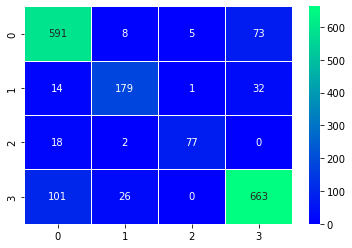

                                                                           precision    recall  f1-score   support

                              Pengguna Kredit Hemat (Frugal Credit Users)       0.82      0.87      0.84       677
                                    Pengguna Level Tengah (Middle Ground)       0.83      0.79      0.81       226
Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)       0.93      0.79      0.86        97
         Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)       0.86      0.84      0.85       790

                                                                 accuracy                           0.84      1790
                                                                macro avg       0.86      0.82      0.84      1790
                                                             weighted avg       0.85      0.84      0.84      1790



In [67]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'winter')
plt.show()
print(classification_report(y_test, y_pred))

In [68]:
print('Ringkasan Evaluasi Model Random Forest Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred))
print('Presisi :', precision_score(y_test,y_pred, average='macro'))
print('Recall :', recall_score(y_test,y_pred, average='macro'))
print('F1 Score :', f1_score(y_test,y_pred, average='macro'))

Ringkasan Evaluasi Model Random Forest Classifier
Akurasi : 0.8435754189944135
Presisi : 0.8599621438624535
Recall : 0.8245148295866325
F1 Score : 0.8405302911944149


In [ ]:
print('--- PREDIKSI PENENTUAN CLUSTER PENGGUNA KARTU KREDIT MENGGUNAKAN RANDOM FOREST ---')
print('='*100)

saldo = float(input('Jumlah Saldo Pengguna (exp : 40.9321) = '))
pembelian = float(input('Jumlah Pembelian yang Dilakukan Pengguna (exp : 16.0) = '))
pembelianoneoff = float(input('Banyaknya Satu Kali Pembelian yang Dilakukan Pengguna (exp : 16.0) = '))
pembelianangsuran = float(input('Jumlah Pembelian Angsuran yang Dilakukan Pengguna (exp : 95.0) = '))
penarikantunai = float(input('Jumlah Penarikan Tunai yang Dilakukan Pengguna (exp : 205.23) = '))
bataskredit = float(input('Jumlah Batas Kredit Pengguna (exp : 7000.0) = '))
pembayaran = float(input('Jumlah Pembayaran yang Harus Dibayarkan Pengguna (exp : 312.87) = '))
minimalpembayaran = float(input('Jumlah Minimal Pembayaran yang Harus Dibayarkan Pengguna (exp : 1072.87) = '))
jangkawaktu = int(input('Jangka Waktu Pengguna Kredit (inputan : 6/7/8/9/10/11/12) = '))

val = [saldo, pembelian, pembelianoneoff, pembelianangsuran, penarikantunai, bataskredit, pembayaran, 
       minimalpembayaran, jangkawaktu]
print(val)

predict_rfc = RFC.predict([val])
print('='*100)
print('Berdasarkan analisa, pengguna masuk kedalam cluster : ', predict_rfc)

### Save Model

In [ ]:
pickle.dump(RFC, open('model_FP4.pkl', 'wb'))

## Kesimpulan



Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
- Pengelompokkan pengguna kartu kredit berdasarkan 17 atribut dilakukan dengan menerapkan metode K-Means
- Dengan menggunakan metode Elbow, diperoleh jumlah klaster optimal, yaitu 4 klaster
- Klaster 1 merupakan klaster dengan pengguna dengan penarikan tinggi sebanyak 44%, klaster 2 merupakan klaster dengan pengguna level tengah sebanyak 37%, klaster 3 merupakan klaster dengan pengguna kredit hemat sebesar 13% dan klaster 4 merupakan klaster dengan kredit pembelian tinggi sebesar 6%.
- Setelah klaster terbentuk, dapat membuat model klasifikasi untuk prediksi kelompok pengguna kartu kredit dengan menggunakan algoritma Random Forest.
- Fitur yang digunakan dalam pengklasifikasian adalah `Saldo`, `Pembelian`, `PembelianOneOff`, `PembelianAngsuran`, `PenarikanTunai`, `BatasKredit`, `Pembayaran`, `MinimalPembayaran`, `JangkaWaktu`.
- Akurasi yang diperoleh dengan klasifikasi kelompok pengguna kartu kredit menggunakan algoritma Random Forest adalah 84% di mana angka ini menunjukkan model klasifikasi sudah cukup baik.